Importing the required python modules:

In [29]:
import sklearn as sk
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random 
import unittest

# Task 1: Generating Binary Synthetic Datasets

## (a) `make_circles` Dataset

A dataset was generated from `make_circles` with the following options: n_samples=1000, random_state=0, noise=0.2, factor =0.6, and inputs=2.

In [30]:
# Generate the first datset according to the specifications
x1_a, y1_a = sk.datasets.make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.6)

The following scatter plot was generated from this dataset:

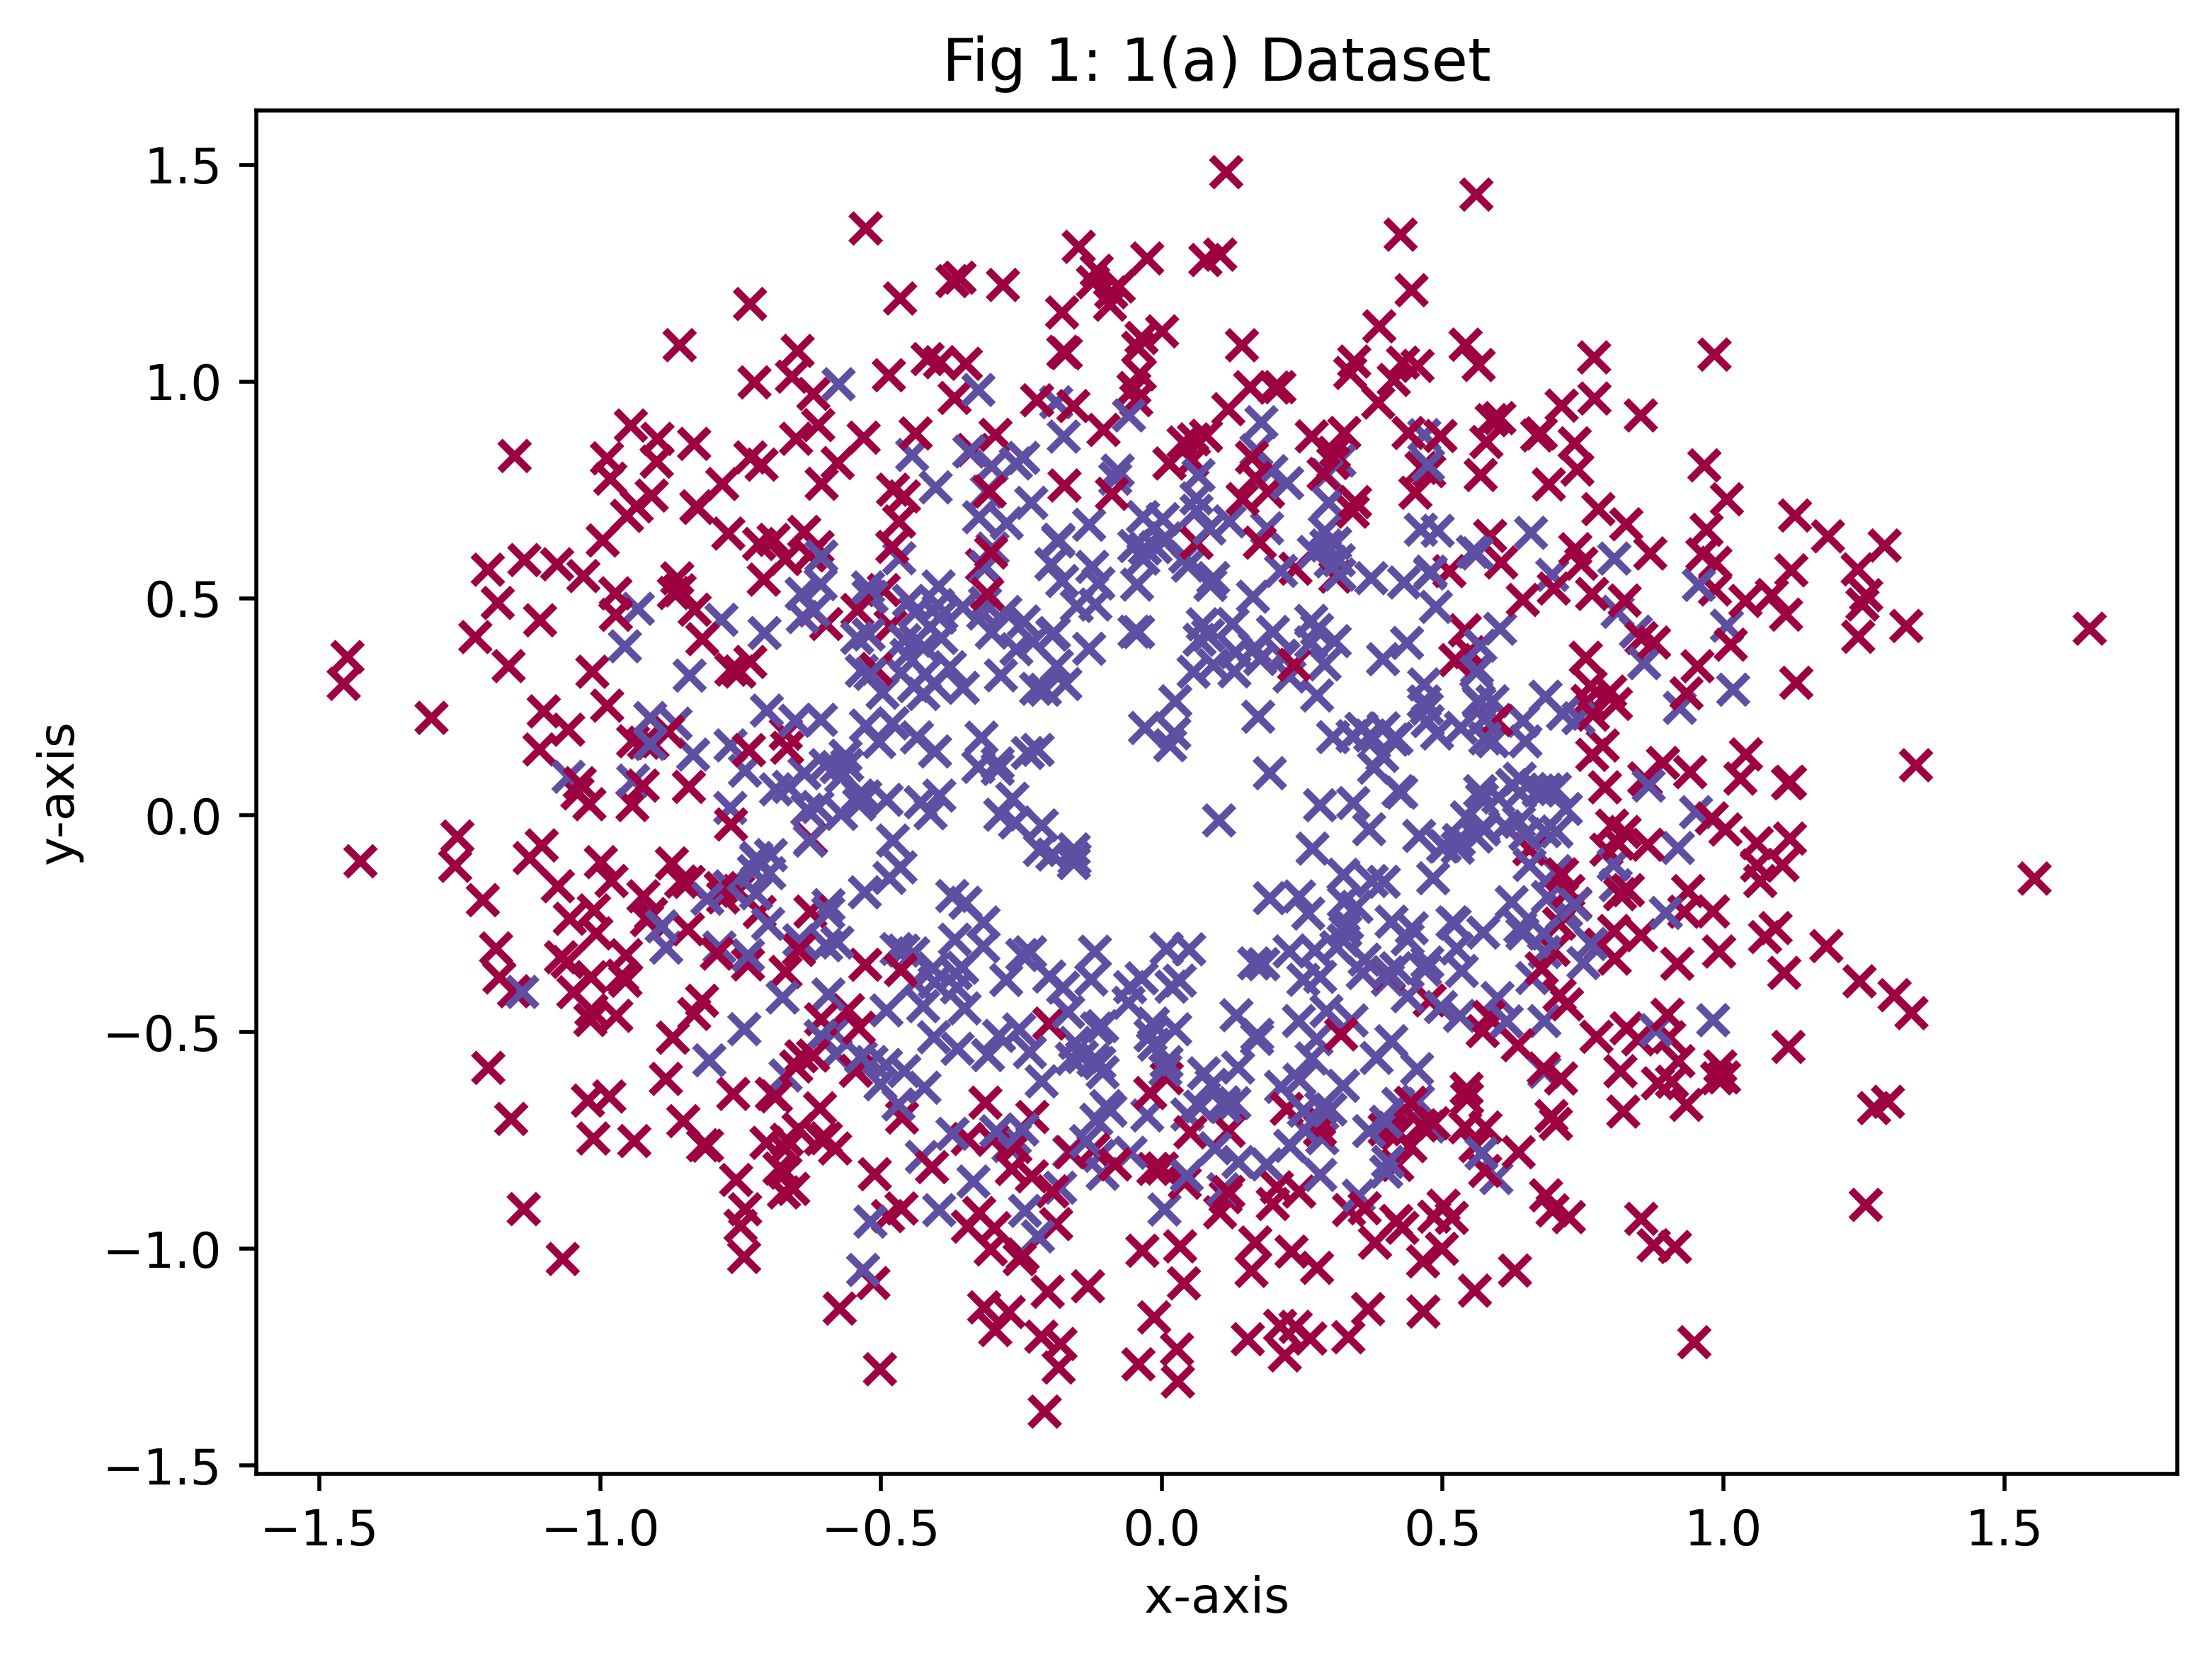

In [31]:
# Plot the dataset as a scatter plot
plt.figure(figsize=(7, 5), dpi=500)
plt.scatter(x1_a[:, 0], x1_a[:, 1], c=y1_a, cmap=plt.cm.Spectral, marker='x')
plt.title("Fig 1: 1(a) Dataset")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

To show the distribution of the output labels of this dataset, a histogram was generated:

The distribution of labels in 1(a) dataset is: [500 500]


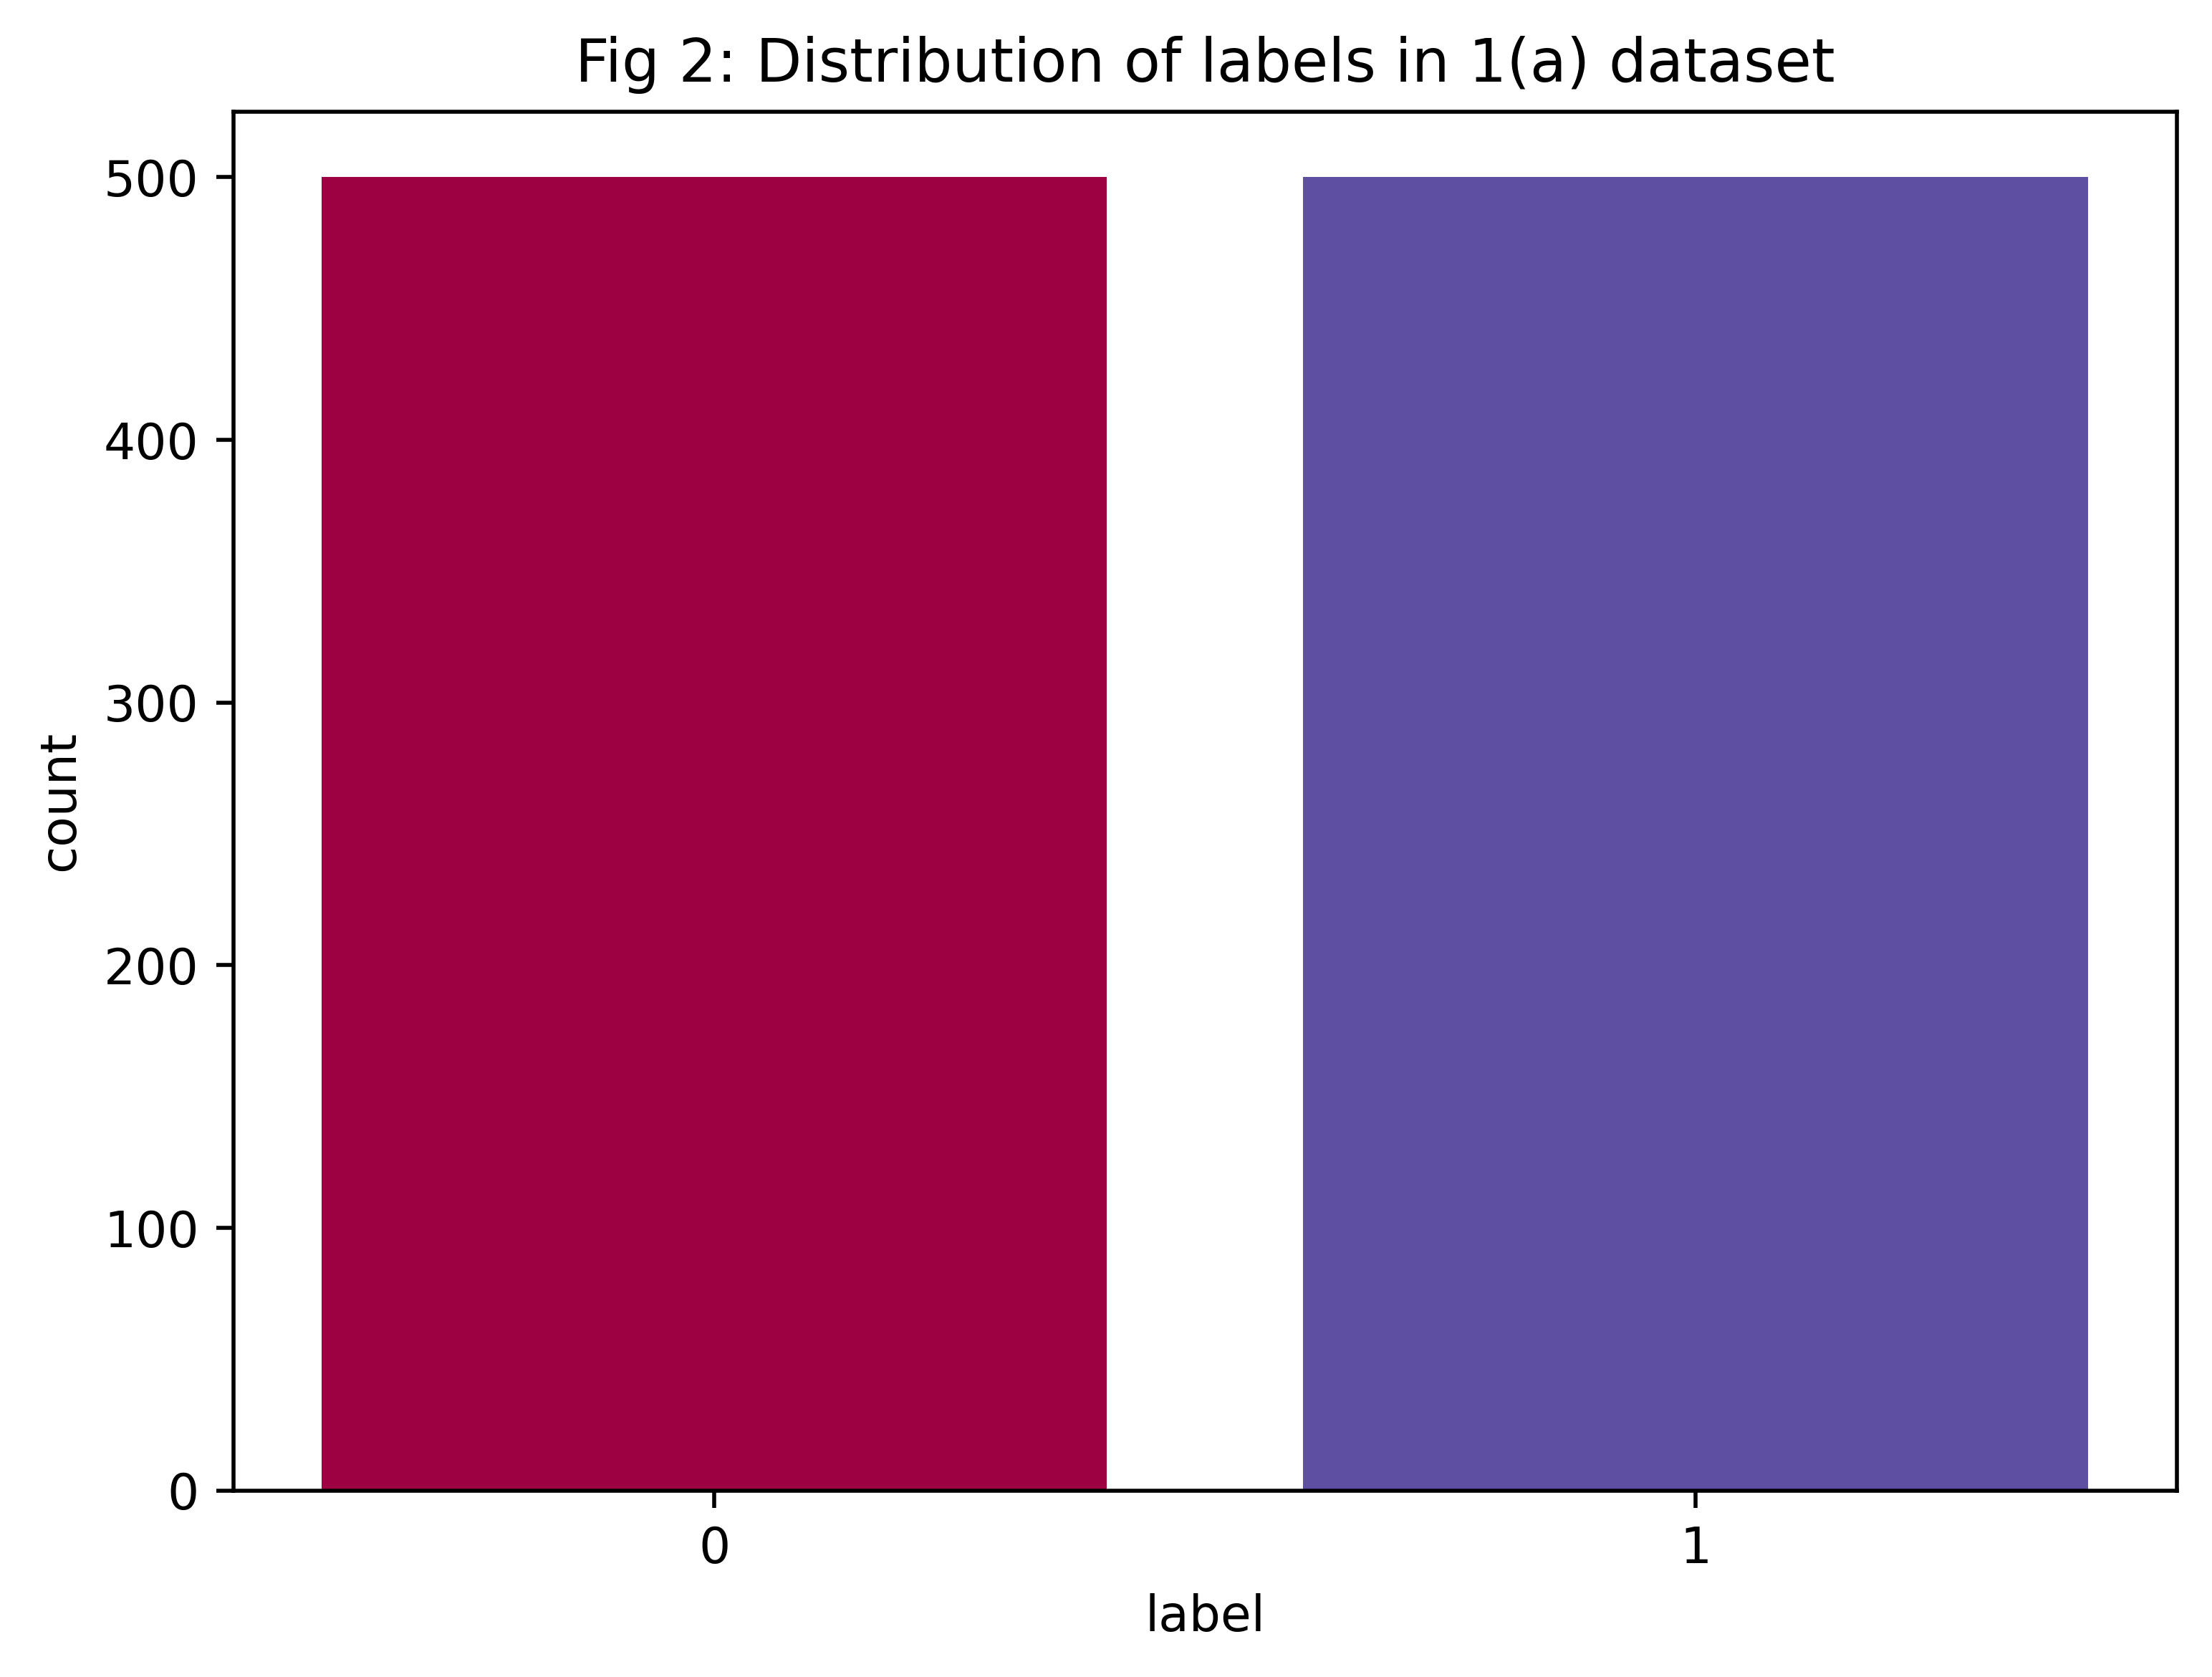

In [32]:
labels, counts = np.unique(y1_a, return_counts=True) # Get the unique labels and their counts

# Print the distribution of labels
print("The distribution of labels in 1(a) dataset is:", counts)

# Plot the distribution of labels as a bar chart
plt.figure(figsize=(7, 5), dpi=500) 
plt.bar(labels, counts, tick_label=labels, color=plt.cm.Spectral(np.linspace(0, 1, len(labels))))
plt.title('Fig 2: Distribution of labels in 1(a) dataset')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

From Fig 2, it can be observed that the distribution of the output labels is balanced, with 500 instances for each output label.

Lastly, the mean and standard deviation of the input variables were calculated, and the results are as follows:

In [33]:
# Calculate the mean of the dataset
mean_1a = np.mean(x1_a, axis=0)

# Calculate the standard deviation of the dataset
std_dev_1b = np.std(x1_a, axis=0)

# Display the mean and standard deviation
print("Mean of input variable 1:", mean_1a[0], "\nStandard deviation of input variable 1: ", std_dev_1b[0])
print("Mean of input variable 2:", mean_1a[1], "\nStandard deviation of input variable 2: ", std_dev_1b[1])

Mean of input variable 1: 0.0024431901199145315 
Standard deviation of input variable 1:  0.6158257970105209
Mean of input variable 2: -0.002516764617150045 
Standard deviation of input variable 2:  0.6164773756351923


## (b) `make_blobs` Dataset

A dataset was generated from `make_blobs` with the following options: n_samples=1000,centers=2, cluster_std=1.0, n_features=2, random_state=0.

In [34]:
# Generate the second dataset according to the specifications
x1_b, y1_b = sk.datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.0, n_features =2, random_state=0)

The following scatter plot was generated from this dataset:

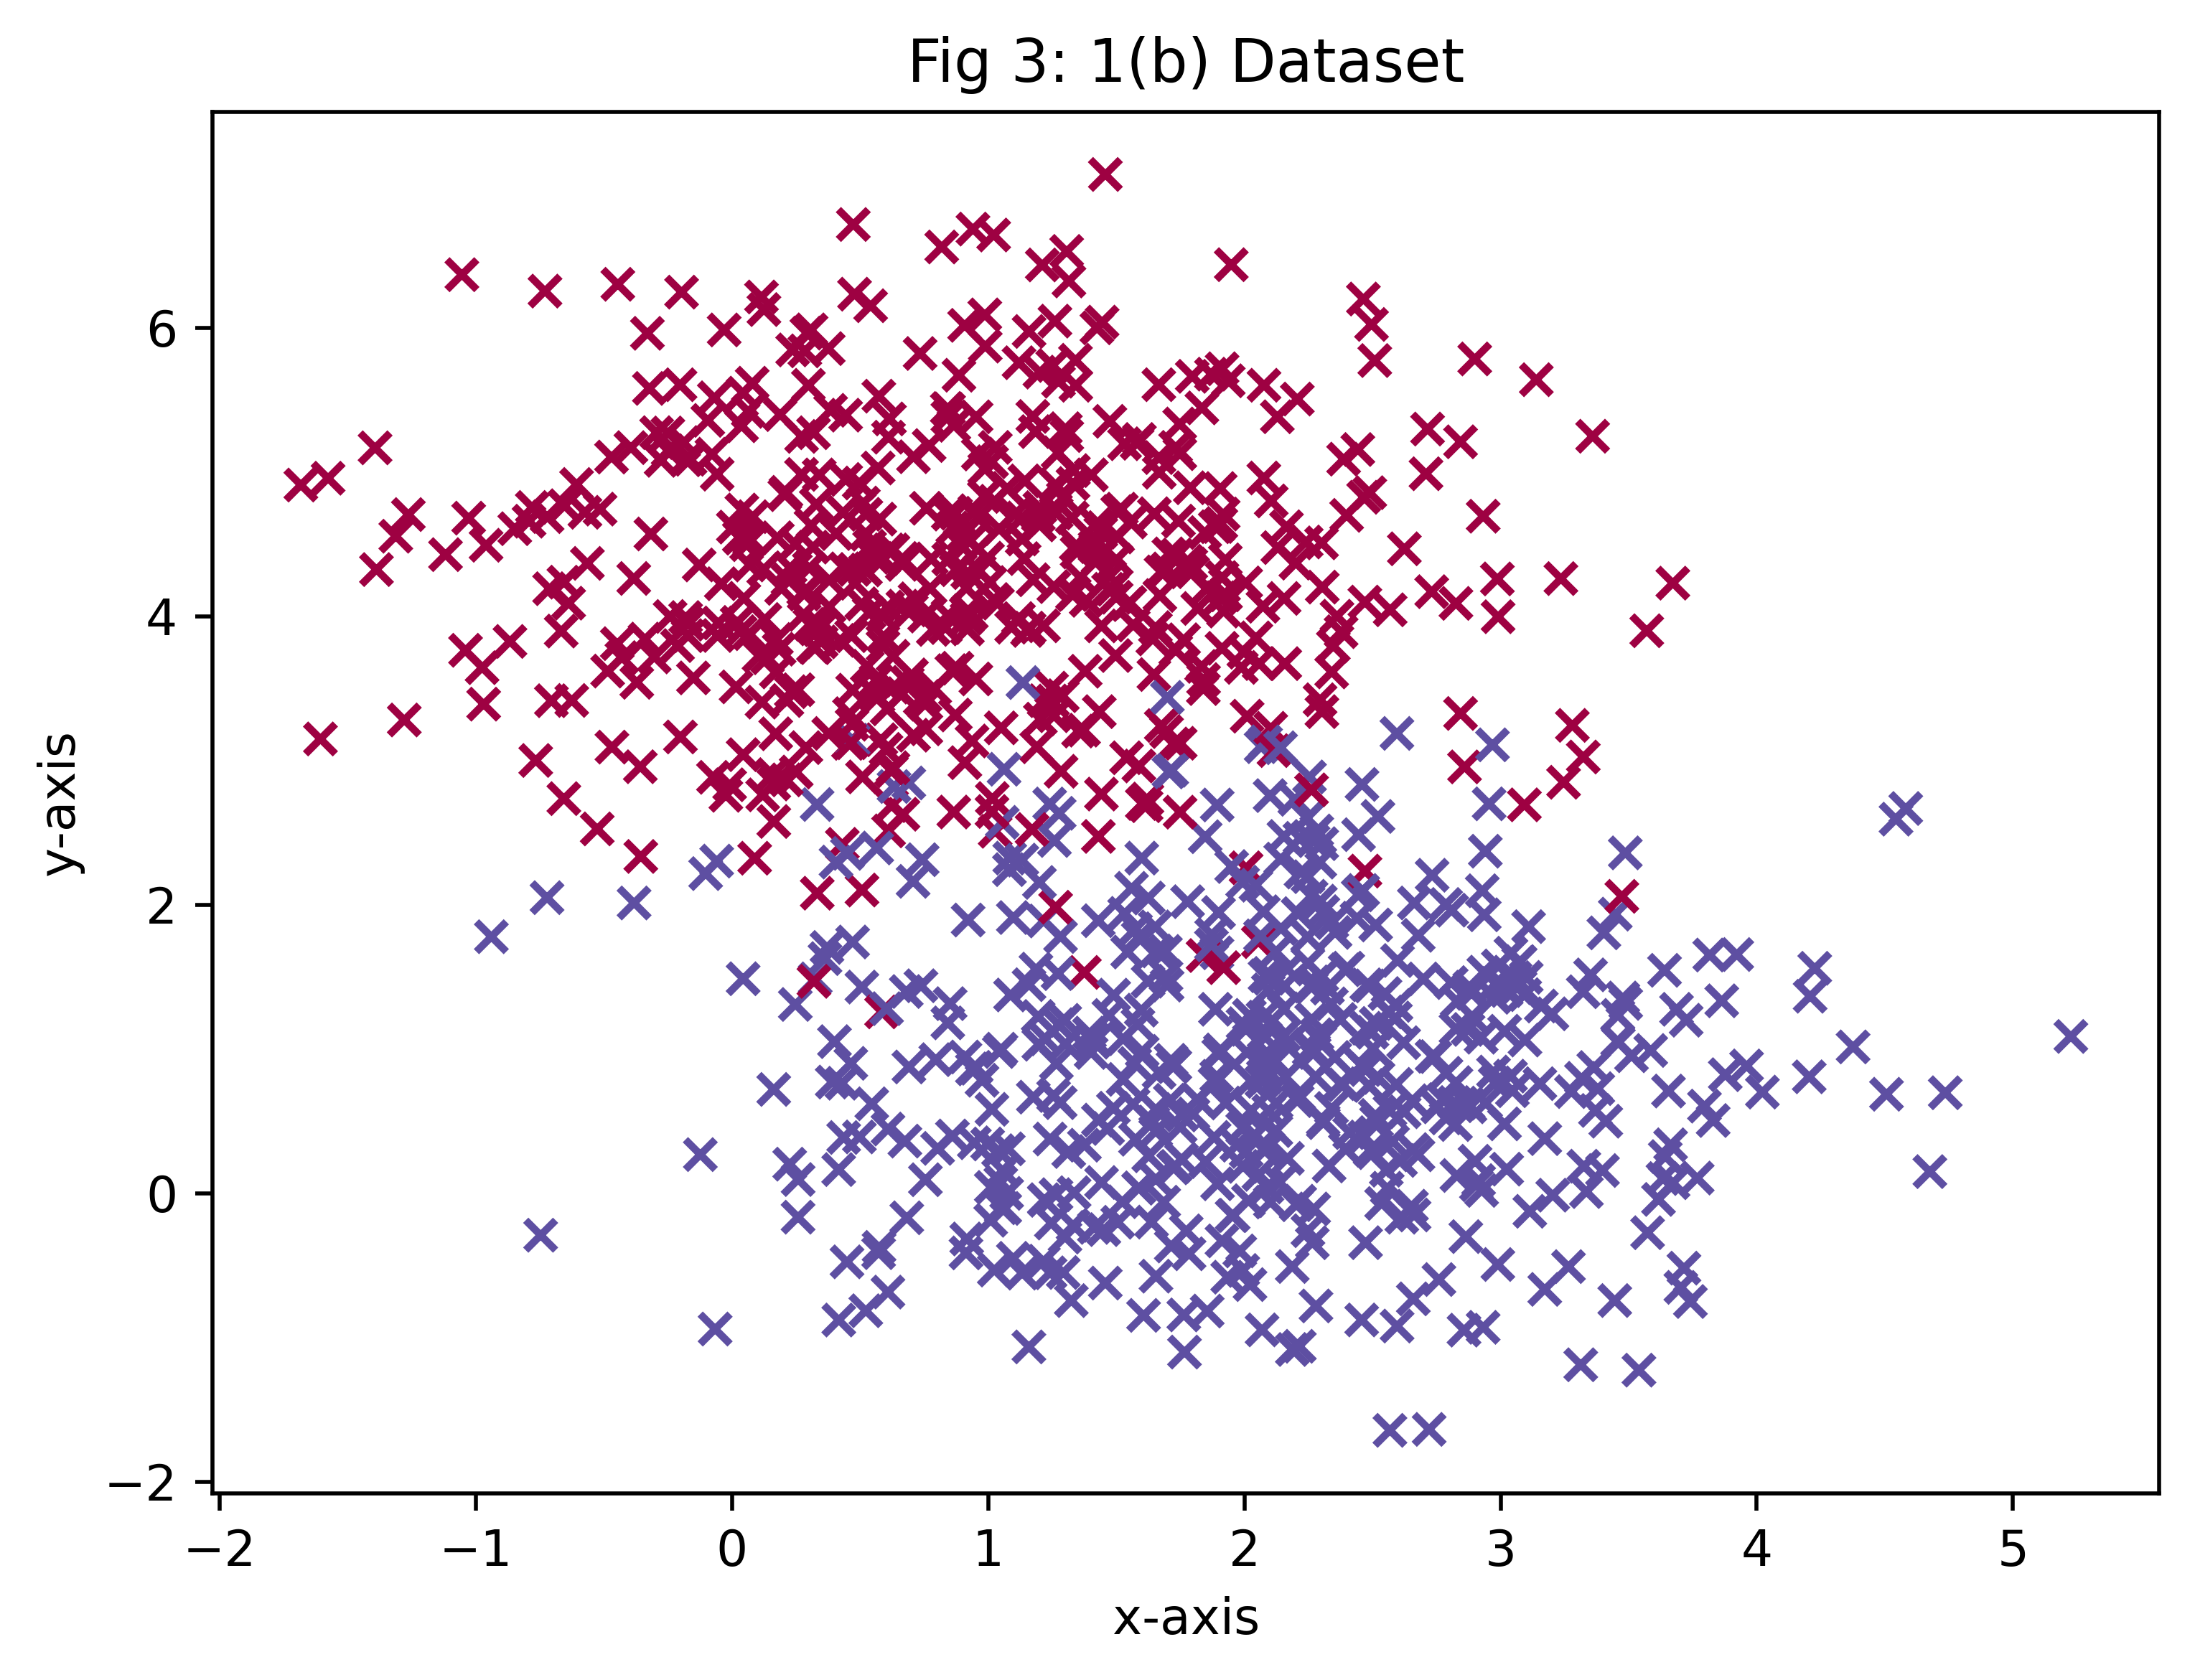

In [35]:
# Plot the dataset as a scatter plot
plt.figure(figsize=(7, 5), dpi=500)
plt.scatter(x1_b[:, 0], x1_b[:, 1], c=y1_b, cmap=plt.cm.Spectral, marker='x')
plt.title("Fig 3: 1(b) Dataset")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

To show the distribution of the output labels of this dataset, a histogram was generated:

The distribution of labels in 1(b) dataset is: [500 500]


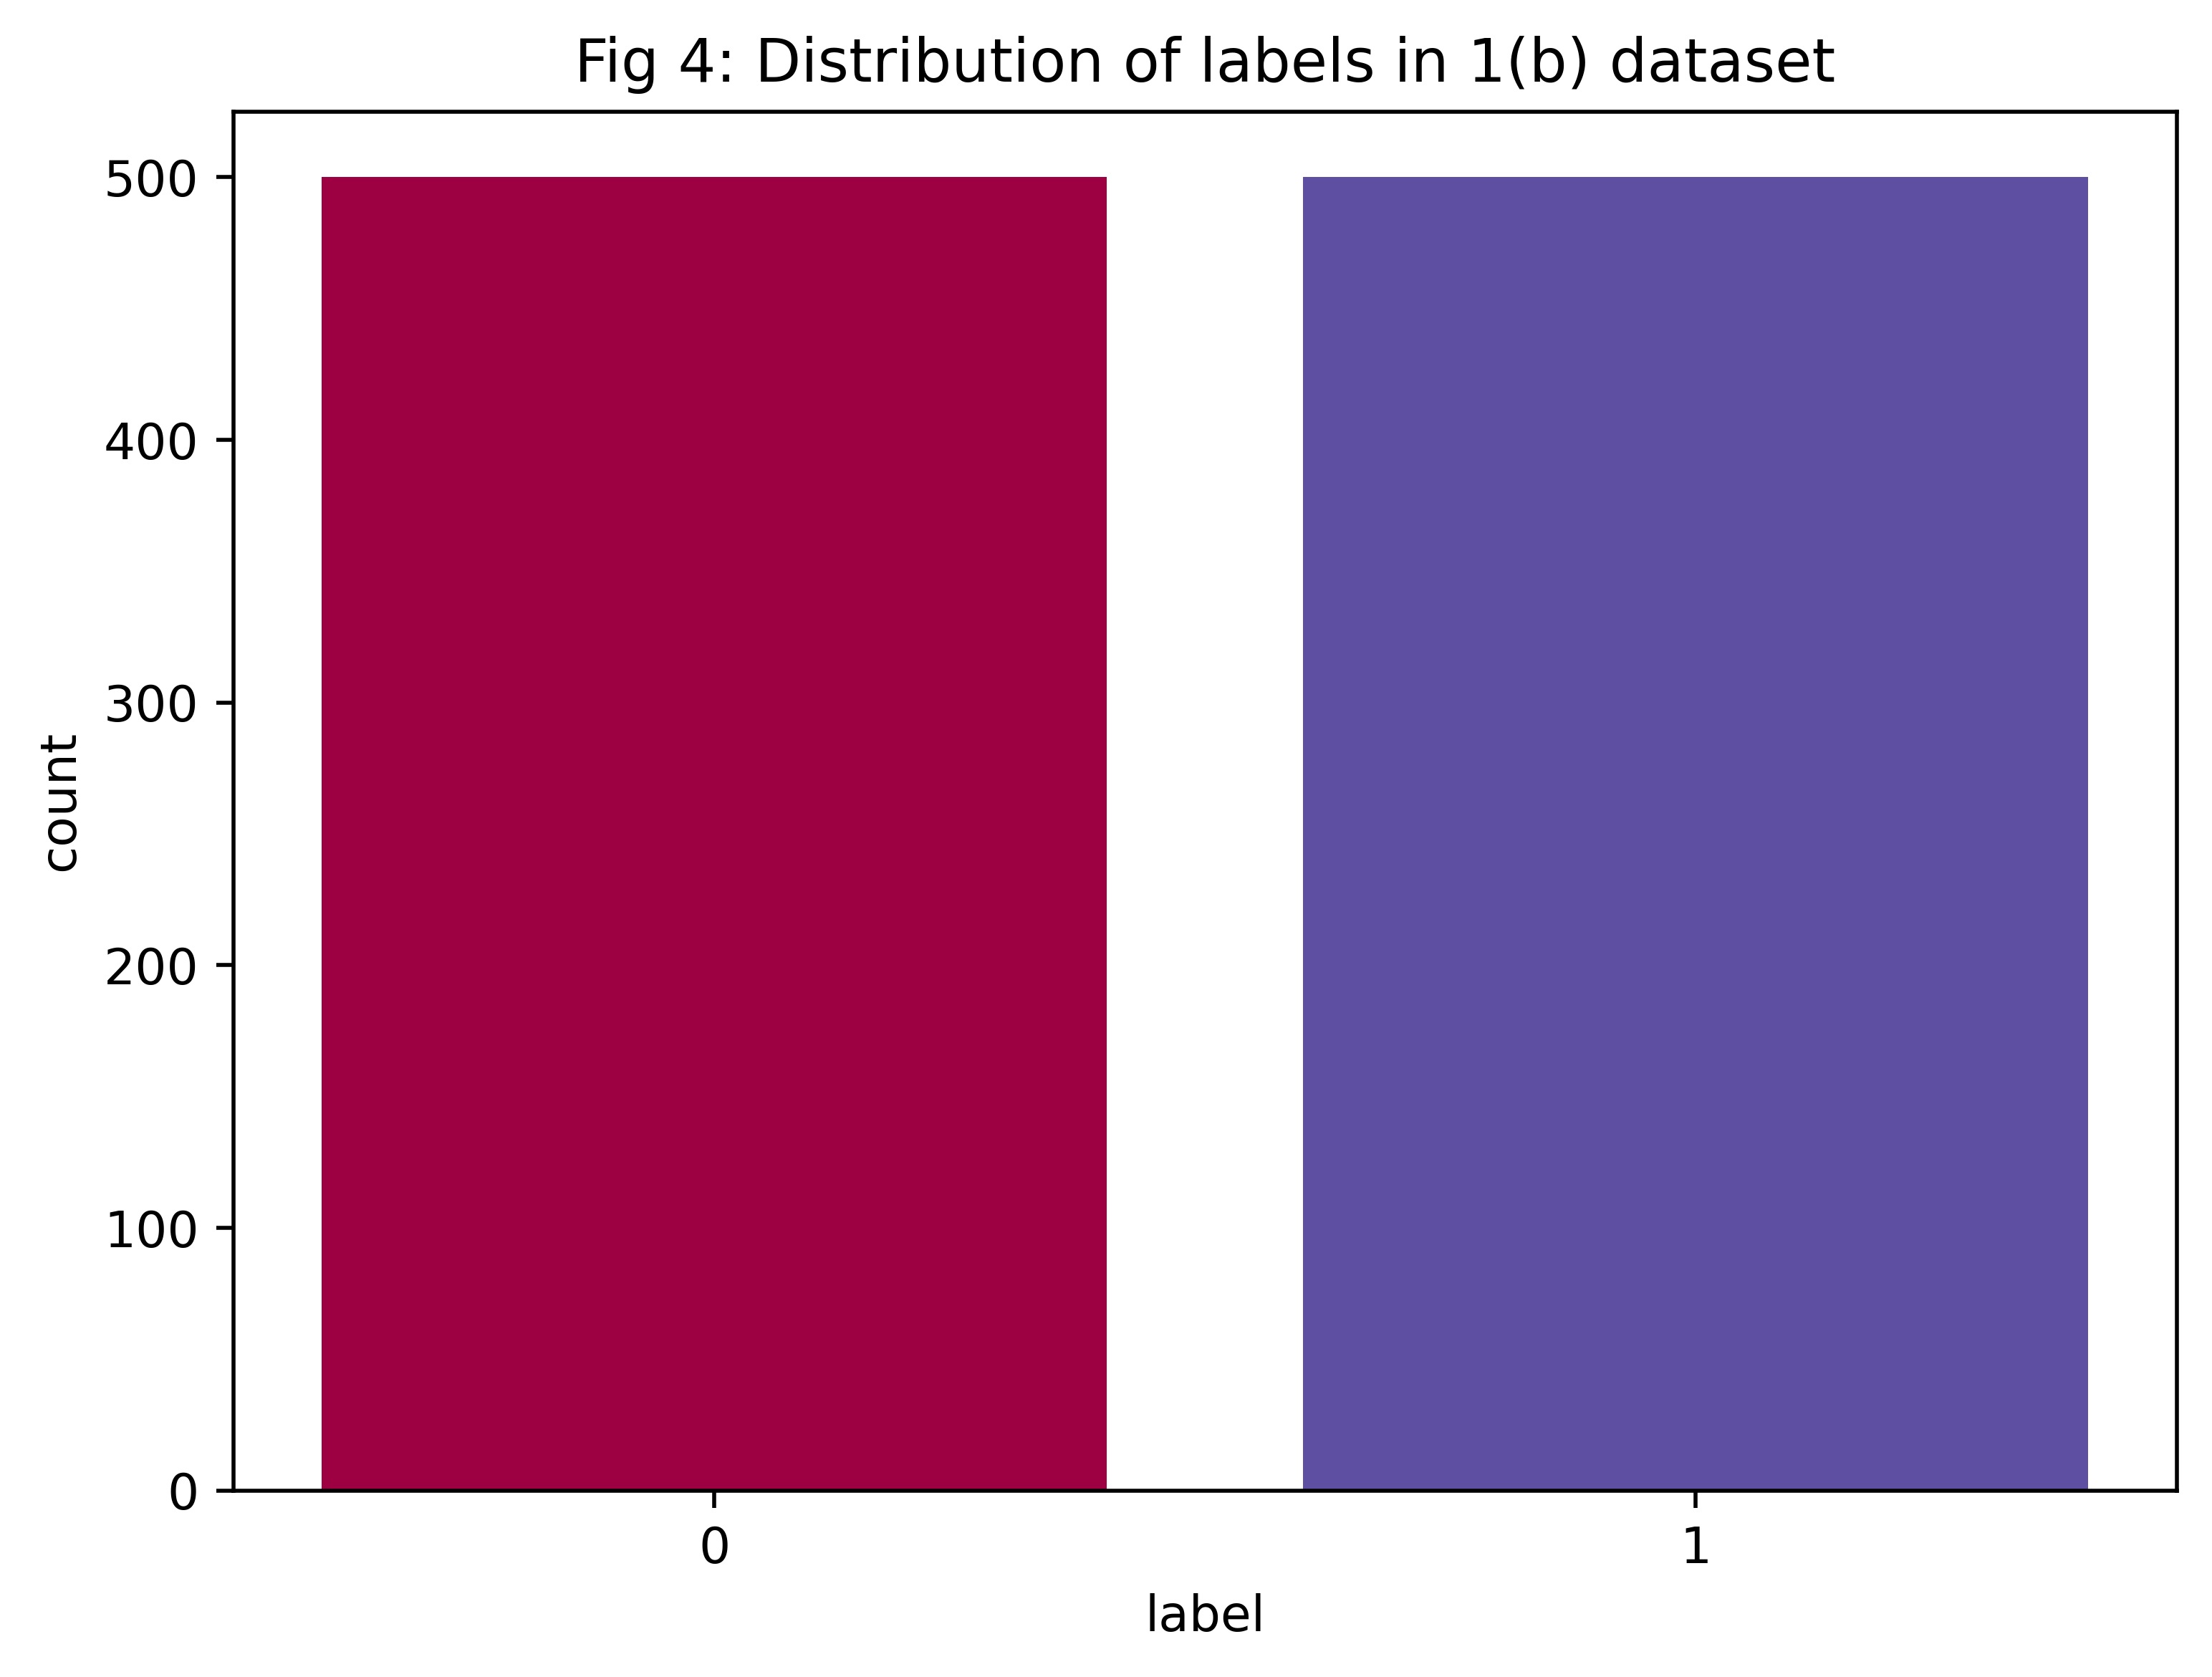

In [44]:
labels, counts = np.unique(y1_b, return_counts=True) # Get the unique labels and their counts

# Print the distribution of labels
print("The distribution of labels in 1(b) dataset is:", counts)

# Plot the distribution of labels as a bar chart
plt.figure(figsize=(7, 5), dpi=500) 
plt.bar(labels, counts, tick_label=labels, color=plt.cm.Spectral(np.linspace(0, 1, len(labels))))
plt.title('Fig 4: Distribution of labels in 1(b) dataset')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

From Fig 4, it can be observed that the distribution of the output labels is balanced, with 500 instances for each output label.

Lastly, the mean and standard deviation of the input variables were calculated, and the results are as follows:

In [37]:
# Calculate the mean of the dataset
mean_1b = np.mean(x1_b, axis=0)

# Calculate the standard deviation of the dataset
std_dev_1b = np.std(x1_b, axis=0)

# Display the mean and standard deviation
print("Mean of input variable 1:", mean_1b[0], "\nStandard deviation of input variable 1: ", std_dev_1b[0])
print("Mean of input variable 2:", mean_1b[1], "\nStandard deviation of input variable 2: ", std_dev_1b[1])

Mean of input variable 1: 1.489802739279975 
Standard deviation of input variable 1:  1.1343317178294188
Mean of input variable 2: 2.58551081585241 
Standard deviation of input variable 2:  1.9539004315889326


# Task 2: Function Implementations

## (a) Function to Reshuffle and Split Data

The following is the implementation of the function which re-shuffles and splits a dataset into two portions:

In [38]:
def shuffle_and_split(dataset, ratio):

    """

    Shuffles the input data and splits it into two parts.

    Parameters:
        dataset (numpy array): The input dataset.
        ratio (float): The ratio of the split.

    Returns:
        numpy array: The first part of the split dataset.
        numpy array: The second part of the split dataset.
        
    """

    # Convert the dataset to a list
    dataset = dataset.tolist()

   # Perform the Knuth shuffle on the dataset 
    for i in range(len(dataset) - 1, 0, -1): # Iterate over the dataset in reverse order
        random_index = random.randint(0, i) # Generate a random index
        dataset[i], dataset[random_index] = dataset[random_index], dataset[i] # Swap the elements at the random index and the current index
    
    # Calculate where to split the dataset
    split_index = int(len(dataset) * ratio)
    
    # Split the dataset
    dataset_1 = dataset[:split_index]
    dataset_2 = dataset[split_index:]
    
    dataset_1, dataset_2 = np.array(dataset_1), np.array(dataset_2)
    
    return dataset_1, dataset_2

The function `shuffle_and_split` takes in a dataset and a split ratio as input arguments and returns two datasets, one for training and the other for testing. The function first shuffles the dataset using the Knuth shuffle algorithm and then splits it into two portions based on the split ratio. It then returns the two portions.

To test this function, the following unit tests were implemented:

In [39]:
# Create a test class
class shuffle_and_split_tests(unittest.TestCase):
    def setUp(self):
        # Create a dataset for testing
        self.dataset = np.arange(200).reshape((100, 2))

    def test_shuffling_of_dataset(self):
        # Test that the dataset is shuffled
        first_part, second_part = shuffle_and_split(self.dataset, 0.5)
        self.assertFalse(np.array_equal(first_part, self.dataset[:50])) and self.assetFalse(np.array_equal(second_part, self.dataset[50:]))

    def test_splitting_of_dataset_in_half(self):
        # Test that the dataset is split in half
        _, split_dataset = shuffle_and_split(self.dataset, 0.5)
        self.assertEqual(len(split_dataset), 50)

    def test_splitting_of_dataset_in_0_8_portion(self):
        # Test that the dataset is split in 0.8 portion
        first_part, second_part = shuffle_and_split(self.dataset, 0.8)
        self.assertEqual(len(first_part), 80) and self.assertEqual(len(second_part), 20)

    def test_splitting_of_dataset_in_0_3_portion(self):
        # Test that the dataset is split in 0.3 portion
        first_part, second_part = shuffle_and_split(self.dataset, 0.3)
        self.assertEqual(len(first_part), 30) and self.assertEqual(len(second_part), 70)

    def test_splitting_of_dataset_in_0_portion(self):
        # Test that the dataset is split in 0 portion
        first_part, second_part = shuffle_and_split(self.dataset, 0)
        self.assertEqual(len(first_part), 0) and self.assertEqual(len(second_part), 100)

    def test_splitting_of_dataset_in_1_portion(self):
        # Test that the dataset is split in 1 portion
        first_part, second_part = shuffle_and_split(self.dataset, 1)
        self.assertEqual(len(first_part), 100) and self.assertEqual(len(second_part), 0)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.003s

OK


## (b) Function to Calculate Binary Classification Metrics

The following is the implementation of the function which computes and returns the classification accuracy, recall, precision and F1-score for a binary classification task.

In [40]:
def binary_class_metrics(labels, predicted):
    
    """
    
    Calculates the accuracy, precision, recall and F1 score of a binary classification model.
    
    
    Parameters:
        labels (numpy array): The true labels.
        predicted (numpy array): The predicted labels.

    Returns:
        dict: A dictionary containing the accuracy, precision, recall and F1 score.

    """

    TP = np.sum((predicted == 1) & (labels == 1)) # Calculate the number of true positives
    TN = np.sum((predicted == 0) & (labels == 0)) # Calculate the number of true negatives
    FP = np.sum((predicted == 1) & (labels == 0)) # Calculate the number of false positives
    FN = np.sum((predicted == 0) & (labels == 1)) # Calculate the number of false negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN) # Calculate the accuracy

    precision = TP / (TP + FP) # Calculate the precision

    recall = TP / (TP + FN) # Calculate the recall

    # Calculate the F1 score
    if precision + recall == 0: # Check if the denominator is zero to avoid division by zero
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall) # Calculate the F1 score

    # Return the metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}

The function `binary_classification_metrics` takes in an array of true labels and an array predicted labels as input and returns the classification accuracy, recall, precision, and F1-score as a dictionary. It first calculates the true positives, false positives, false negatives, and true negatives based, and based on these it computes the classification accuracy, recall, precision, and F1-score.

To test this function, the following unit tests were implemented:

In [43]:
# Create a test class
class binary_class_metrics_tests(unittest.TestCase):

    def setUp(self):
        # Create a dataset for testing
        self.labels = np.array([1, 0, 1, 0, 1]) 
    
    # Test the function with perfect predictions
    def test_perfect_predictions(self):

        # Creating an array of perfect predictions
        predicted = np.array([1, 0, 1, 0, 1])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 1.0)
        self.assertEqual(metrics['precision'], 1.0)
        self.assertEqual(metrics['recall'], 1.0)
        self.assertEqual(metrics['f1_score'], 1.0)

    # Test the function with all incorrect predictions
    def test_all_incorrect_predictions(self):

        # Creating an array of all incorrect predictions
        predicted = np.array([0, 1, 0, 1, 0])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 0.0)
        self.assertEqual(metrics['precision'], 0.0)
        self.assertEqual(metrics['recall'], 0.0)
        self.assertEqual(metrics['f1_score'], 0.0)

    # Test the function with mixed correct and incorrect predictions
    def test_mixed_predictions(self):

        # Creating an array of mixed correct and incorrect predictions
        predicted = np.array([1, 1, 0, 0, 1])

        metrics = binary_class_metrics(self.labels, predicted)
        self.assertEqual(metrics['accuracy'], 0.6)
        self.assertEqual(metrics['precision'], 0.6666666666666666)
        self.assertEqual(metrics['recall'], 0.6666666666666666)
        self.assertEqual(metrics['f1_score'], 0.6666666666666666)

# Running the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.007s

OK


# Task 3: k-NN Models

## (a) Splitting Datasets into Training and Testing Sets